

# <font color=blue>Validation Revised CNN Model</font>

## Model built with Training & Validation dataset



## 12000 data; 50% phishing - 50% benign

#### Result: 
- batch_size=128, epochs=80
- CNN: Accuracy on training Data: 93.64%
- CNN: Accuracy on TEST Data: 93.42%
- CNN: Accuracy on validation Data: 92.50%

#### Validation Process


In [1]:
# Fix random seeds for Reproducibility

from numpy.random import seed
seed(1)

import tensorflow as tf
tf.random.set_seed(2)

In [2]:
import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [3]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score



C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\multiclass.py:13: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix


In [4]:
# data
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#evaluation, analyzing results
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#demonstration of calculating metrics for a neural network model using sklearn
import tensorflow.keras as k

#train neural network
import tensorflow.compat.v1 as tf
 
print(tf.__version__)

import datetime


2.10.0


## <font color=green>Importing Dataset</font>


In [5]:

val_data = pd.read_csv("/home/jovyan/Datasets/Dataset1/Creating-data/finaldata_updated.csv")


In [6]:
val_data

,domain,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,0,1,0,29,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,1,21,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,8,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,1,1,6,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,polska-olx.pl,0,0,0,2,0,0,0,1,0,1,1,1,0,6,0,1
11996,fb-updates-1000151020200412545154000588-mc.tk,0,0,1,1,0,0,0,1,0,1,1,1,0,4,0,1
11997,whattsapps.misecure.com,0,0,0,0,0,0,0,0,0,0,0,1,0,4,1,1
11998,nfta.co.za,0,0,1,2,0,0,0,0,0,1,1,1,1,5,1,1


## <font color=green>Exploratory Data Analysis (EDA) </font>


In [7]:
# Look for missing values
val_data.isnull().sum()   

# No missing values found, so no need to drop or replace any value

domain               0
ip_present           0
at_present           0
url_length           0
url_depth            0
redirection          0
https_domain         0
short_url            0
prefix/suffix        0
dns_record           0
web_traffic          0
domain_age           0
domain_end           0
dot_count            0
specialchar_count    0
subdom_count         0
label                0
dtype: int64

In [8]:
# Count class label

val_data['label'].value_counts()

# 0 Legitimate
# 1 Phishing

0    6000
1    6000
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

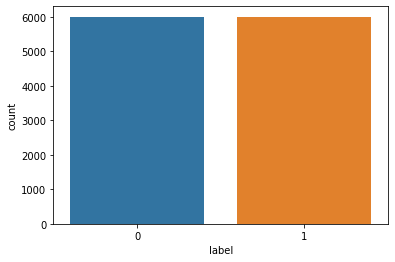

In [9]:
sns.countplot(x= 'label' , data = val_data)

In [10]:
val_data.columns

Index(['domain', 'ip_present', 'at_present', 'url_length', 'url_depth',
       'redirection', 'https_domain', 'short_url', 'prefix/suffix',
       'dns_record', 'web_traffic', 'domain_age', 'domain_end', 'dot_count',
       'specialchar_count', 'subdom_count', 'label'],
      dtype='object')

In [11]:
val_data.describe()

,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
count,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000
mean,0.0,0.024333,0.731083,2.657000,0.012667,0.0,0.095833,0.155917,0.048667,0.840333,0.528917,0.842667,0.239083,7.95650,0.287917,0.500000
std,0.0,0.154088,0.443415,2.126004,0.111836,0.0,0.294375,0.362791,0.215179,0.366312,0.499184,0.364130,0.426542,5.19601,0.452811,0.500021
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.00000,0.000000,0.000000
50%,0.0,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,7.00000,0.000000,0.500000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,9.00000,1.000000,1.000000
max,0.0,1.000000,1.000000,20.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,169.00000,1.000000,1.000000


In [12]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   domain             12000 non-null  object
 1   ip_present         12000 non-null  int64 
 2   at_present         12000 non-null  int64 
 3   url_length         12000 non-null  int64 
 4   url_depth          12000 non-null  int64 
 5   redirection        12000 non-null  int64 
 6   https_domain       12000 non-null  int64 
 7   short_url          12000 non-null  int64 
 8   prefix/suffix      12000 non-null  int64 
 9   dns_record         12000 non-null  int64 
 10  web_traffic        12000 non-null  int64 
 11  domain_age         12000 non-null  int64 
 12  domain_end         12000 non-null  int64 
 13  dot_count          12000 non-null  int64 
 14  specialchar_count  12000 non-null  int64 
 15  subdom_count       12000 non-null  int64 
 16  label              12000 non-null  int64

In [13]:
# Shuffle
# shuffle dataset **once**, but reliably so that each run yields the same results

data = shuffle(val_data, random_state=42)

data

,domain,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
1935,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,1,0,6,0,0
6494,78.143.96.35,0,0,1,3,0,0,0,0,0,1,0,1,1,19,1,1
1720,superuser.com,0,0,1,3,0,0,0,0,0,1,0,1,0,6,0,0
9120,heylink.me,0,0,0,1,0,0,1,0,0,1,0,1,0,4,0,1
360,torrentdn.com,0,0,1,2,0,0,0,0,0,1,1,1,0,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,vmi330298.contaboserver.net,0,0,0,3,0,0,0,0,0,1,0,1,1,6,1,1
5191,censor.net.ua,0,0,1,3,0,0,0,0,0,0,0,1,0,17,1,0
5390,udn.com,0,0,1,4,0,0,0,0,0,1,0,1,0,7,0,0
860,seekingalpha.com,0,0,1,2,0,0,0,0,0,1,0,1,0,5,0,0


## <font color=green>Train Test Val Split </font>


In [14]:

feature_col = ['ip_present', 'at_present', 'url_length', 'url_depth', 'redirection', 'https_domain', 'short_url', 'prefix/suffix', 'dns_record', 'web_traffic', 'domain_age', 'domain_end', 'dot_count', 'specialchar_count', 'subdom_count']
target_col = ['label']

#feature_col = data.iloc[:, 1:16]
#target_col = data.iloc[:, [16]]


In [15]:
# Separating & assigning features and target columns to X & y

y = pd.DataFrame(data[target_col]) #y target
X = data[feature_col] #X feature


X.shape, y.shape

((12000, 15), (12000, 1))

In [16]:
# Spliting the dataset into Training and Test Set


X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, 
                                                    test_size=0.4, random_state=12)


X_train.shape, X_val.shape

#60% training
#40% validation



C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

((7200, 15), (4800, 15))

In [17]:

## Original dataset
y_legw = y.label.value_counts()[0]/(y.label.count())
y_phishw = y.label.value_counts()[1]/(y.label.count())

print("********************** Proportion on the give dataset before the split ********************** \n")
print("Percentage of Legitimate websites :", y_legw)
print("Percentage of Phishing websites   :", y_phishw, "\n")


## Training dataset
y_train_legw = y_train.label.value_counts()[0]/(y_train.label.count())
y_train_phishw = y_train.label.value_counts()[1]/(y_train.label.count())

print("********************** Proportion on the Training dataset **********************\n")
print("Percentage of Legitimate websites :", y_train_legw)
print("Percentage of Phishing websites   :", y_train_phishw, "\n")


## Validation dataset
y_val_legw = y_val.label.value_counts()[0]/(y_val.label.count())
y_val_phishw = y_val.label.value_counts()[1]/(y_val.label.count())

print("********************** Proportion on the Validation dataset **********************\n")
print("Percentage of Legitimate websites :", y_val_legw)
print("Percentage of Phishing websites   :", y_val_phishw, "\n")



********************** Proportion on the give dataset before the split ********************** 

Percentage of Legitimate websites : 0.5
Percentage of Phishing websites   : 0.5 

********************** Proportion on the Training dataset **********************

Percentage of Legitimate websites : 0.5
Percentage of Phishing websites   : 0.5 

********************** Proportion on the Validation dataset **********************

Percentage of Legitimate websites : 0.5
Percentage of Phishing websites   : 0.5 



In [18]:
## 60-40 split

## Displaying the dimensions present in the dataset

print("Dimensions of the original dataset :",X.shape[0], "rows and",X.shape[1],"columns\n")

print("Dimensions of the training dataset :",X_train.shape[0], "rows and",X_train.shape[1],"columns\n")

print("Dimensions of the validation dataset :",X_val.shape[0], "rows and",X_val.shape[1],"columns\n")


Dimensions of the original dataset : 12000 rows and 15 columns

Dimensions of the training dataset : 7200 rows and 15 columns

Dimensions of the validation dataset : 4800 rows and 15 columns



## Standardize the Data

In [19]:

# Converting target variables from dataframe to an array

y_train = np.ravel(y_train)
y_val = np.ravel(y_val)


In [20]:
y_train, y_val

(array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 array([0, 1, 1, ..., 1, 1, 0], dtype=int64))

In [21]:
#train_data - X_train
#test_data - X_test
#train_target - y_train
#test_target - y_test

## Normalize data using StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)  


In [22]:

print(X_train)
print('')
print(type(X_train))


[[ 0.         -0.15409478  0.60752084 ... -0.55959783  0.00243202
  -0.6386704 ]
 [ 0.         -0.15409478  0.60752084 ... -0.55959783 -0.18188966
   1.56575285]
 [ 0.         -0.15409478  0.60752084 ... -0.55959783  0.00243202
  -0.6386704 ]
 ...
 [ 0.         -0.15409478  0.60752084 ... -0.55959783  0.00243202
  -0.6386704 ]
 [ 0.         -0.15409478 -1.64603406 ... -0.55959783 -0.73485473
   1.56575285]
 [ 0.         -0.15409478  0.60752084 ... -0.55959783 -0.18188966
  -0.6386704 ]]

<class 'numpy.ndarray'>


In [23]:

print(X_val)
print('')
print(type(X_val))


[[ 0.         -0.15409478  0.60752084 ... -0.55959783 -0.36621135
  -0.6386704 ]
 [ 0.         -0.15409478  0.60752084 ... -0.55959783  0.55539708
   1.56575285]
 [ 0.         -0.15409478 -1.64603406 ...  1.78699763 -0.73485473
   1.56575285]
 ...
 [ 0.         -0.15409478 -1.64603406 ... -0.55959783 -0.73485473
  -0.6386704 ]
 [ 0.         -0.15409478 -1.64603406 ... -0.55959783 -0.73485473
   1.56575285]
 [ 0.         -0.15409478  0.60752084 ... -0.55959783 -0.73485473
  -0.6386704 ]]

<class 'numpy.ndarray'>


In [24]:

print(X_train.shape)

print(X_val.shape)


(7200, 15)
(4800, 15)



# <font color=red>Machine Learning Models & Training</font>


In [25]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_val = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append("{:.2f}%" .format (a, 2))
    acc_val.append("{:.2f}%" .format (b, 2))

In [26]:
## Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

## instantiate the DecisionTreeClassifier model with criterion gini index
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=9)

## fit the model 
tree.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_val_tree = tree.predict(X_val)
y_train_tree = tree.predict(X_train)


## Computing the accuracy of the model performance
acc_train_tree = (accuracy_score(y_train,y_train_tree)*100)
acc_val_tree = (accuracy_score(y_val,y_val_tree)*100)

print("Decision Tree: Accuracy on training Data: %.2f%%" % (acc_train_tree))
print("Decision Tree: Accuracy on TEST Data: %.2f%%" % (acc_val_tree))

      
#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set

#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(tree.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(tree.score(X_test, y_test) * 100,2), "%")


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecation

Decision Tree: Accuracy on training Data: 89.97%
Decision Tree: Accuracy on TEST Data: 89.65%


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details 

In [27]:
# storing the results. The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_val_tree)

## Decision Tree Report on Val Data

In [28]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of Decision Tree on Val Data')
print('')

print("Decision Tree: Accuracy on VAL Data: %.2f%%" % (acc_val_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_val, y_val_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_val, y_val_tree))



Performance Evaluation of Decision Tree on Val Data

Decision Tree: Accuracy on VAL Data: 89.65%

Decision Tree Confusion Matrix:
[[2196  204]
 [ 293 2107]]

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2400
           1       0.91      0.88      0.89      2400

    accuracy                           0.90      4800
   macro avg       0.90      0.90      0.90      4800
weighted avg       0.90      0.90      0.90      4800



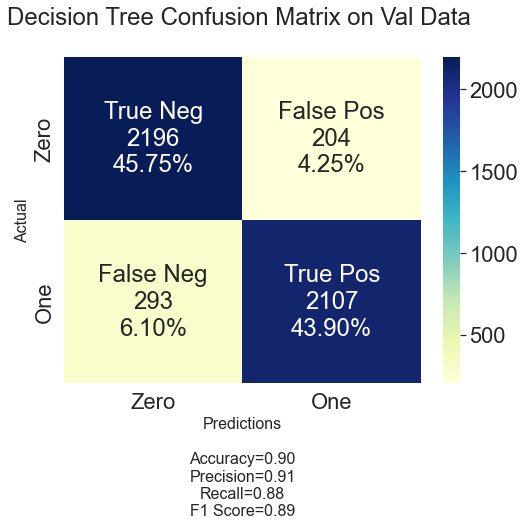

In [29]:
tree_matrix_val = confusion_matrix(y_val, y_val_tree)
sns.set(font_scale=2)


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6) ,
                          cmap='YlGnBu',
                          title='Decision Tree Confusion Matrix on Val Data \n', fontsize=18):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions' + stats_text, fontsize=16) #Predicted label
    else:
        plt.xlabel(stats_text, fontsize=18)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_val, 
                      group_names=labels,
                      categories=categories)

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_val_tree)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

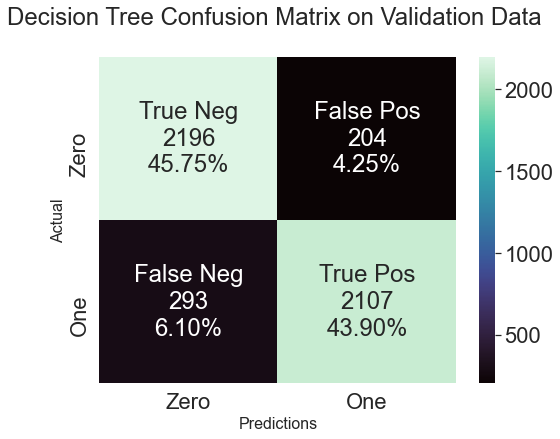

In [31]:
## For Documentation

##Get the confusion matrix
tree_matrix_val = confusion_matrix(y_val, y_val_tree)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='Decision Tree Confusion Matrix on Validation Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_val, 
                      group_names=labels,
                      categories=categories)

#plt.savefig("/home/jovyan/Datasets/Dataset3/Graph-Visuals/cm-tree-val-DOCU.png", bbox_inches='tight', pad_inches=0)


In [32]:
## Classification Report - complete
## Predict the values from the training set

print('Performance Evaluation of Decision Tree on Training Data')
print('')

print("Decision Tree: Accuracy on Training Data: %.2f%%" % (acc_train_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_train, y_train_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_train, y_train_tree))



Performance Evaluation of Decision Tree on Training Data

Decision Tree: Accuracy on Training Data: 89.97%

Decision Tree Confusion Matrix:
[[3304  296]
 [ 426 3174]]

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3600
           1       0.91      0.88      0.90      3600

    accuracy                           0.90      7200
   macro avg       0.90      0.90      0.90      7200
weighted avg       0.90      0.90      0.90      7200



# Random Forest 

In [33]:
## Random Forest model
from sklearn.ensemble import RandomForestClassifier

## instantiate the model
forest = RandomForestClassifier(criterion='gini', max_depth=6, random_state=11)


## fit the model 
forest.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_val_forest = forest.predict(X_val)
y_train_forest = forest.predict(X_train)


## Computing the accuracy of the model performance
acc_train_forest = (accuracy_score(y_train,y_train_forest)*100)
acc_val_forest = (accuracy_score(y_val,y_val_forest)*100)

print("Random Forest: Accuracy on training Data: %.2f%%" % (acc_train_forest))
print("Random Forest: Accuracy on Val Data: %.2f%%" % (acc_val_forest))


#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set



#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(forest.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(forest.score(X_test, y_test) * 100,2), "%")


Random Forest: Accuracy on training Data: 91.00%
Random Forest: Accuracy on Val Data: 90.75%


In [34]:
# storing the results. The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_val_forest)

## Random Forest Report on Val Data

In [35]:
## Classification Report - complete
## Predict the values from the val data

print('Performance Evaluation of Random Forest on Val Data')
print('')

print("Random Forest: Accuracy on Val Data: %.2f%%" % (acc_val_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_val, y_val_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_val, y_val_forest))



Performance Evaluation of Random Forest on Val Data

Random Forest: Accuracy on Val Data: 90.75%

Random Forest Confusion Matrix:
[[2289  111]
 [ 333 2067]]

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2400
           1       0.95      0.86      0.90      2400

    accuracy                           0.91      4800
   macro avg       0.91      0.91      0.91      4800
weighted avg       0.91      0.91      0.91      4800



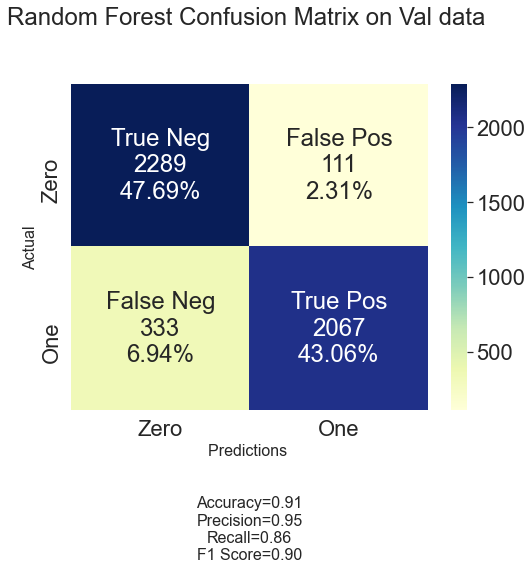

In [36]:

##Get the confusion matrix
forest_matrix_val = confusion_matrix(y_val, y_val_forest)
sns.set(font_scale=2)


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='YlGnBu',
                          title='Random Forest Confusion Matrix on Val data \n\n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16)
        plt.xlabel('Predictions \n' + stats_text, fontsize=16)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_val, 
                      group_names=labels,
                      categories=categories)


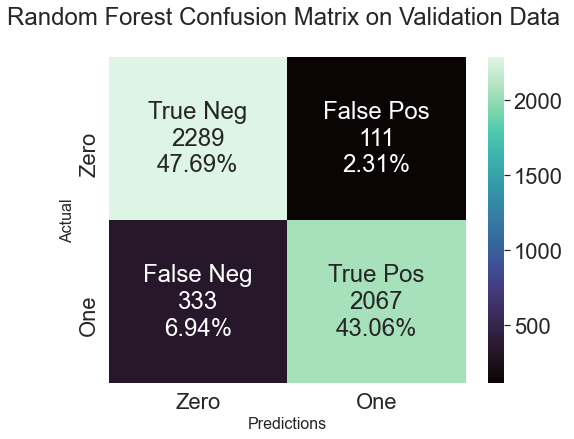

In [37]:
## For Documentation

##Get the confusion matrix
forest_matrix_val = confusion_matrix(y_val, y_val_forest)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='Random Forest Confusion Matrix on Validation Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_val, 
                      group_names=labels,
                      categories=categories)

#plt.savefig("/home/jovyan/Datasets/Dataset3/Graph-Visuals/cm-forest-val-DOCU.png", bbox_inches='tight', pad_inches=0)


In [38]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of Random Forest on Training Data')
print('')

print("Random Forest: Accuracy on Training Data: %.2f%%" % (acc_train_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_train, y_train_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_train, y_train_forest))



Performance Evaluation of Random Forest on Training Data

Random Forest: Accuracy on Training Data: 91.00%

Random Forest Confusion Matrix:
[[3451  149]
 [ 499 3101]]

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3600
           1       0.95      0.86      0.91      3600

    accuracy                           0.91      7200
   macro avg       0.91      0.91      0.91      7200
weighted avg       0.91      0.91      0.91      7200





# <font color=red> CNN Model </font>

In [39]:
# Reshaping data as expected by Sequential model
# convert to 3 dim array

X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

X_val_reshape = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("3 dim array as expected by cnn model")
print("X_train:", X_train_reshape.shape)
print("X_val:", X_val_reshape.shape)


3 dim array as expected by cnn model
X_train: (7200, 15, 1)
X_val: (4800, 15, 1)


In [40]:
# CNN model

#importing required packages

import tensorflow as tf
import tensorflow.keras as k

from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import GlobalMaxPooling1D, Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras import regularizers

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1
from sklearn.model_selection import KFold
import random as rn

import time

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [41]:
INPUT_DIM = X_train_reshape[0].shape


In [42]:
tf.random.set_random_seed(2)


# Model configuration
ADAM = Adam(learning_rate=0.0001)
verbosity = 2
l1 = regularizers.l1(0.0001)

INPUT_DIM = X_train_reshape[0].shape

                                # Define the model architecture
#--Layer Name
proposed = Sequential(name="Proposed_Model")
    
#--Input Layer
proposed.add(Conv1D(20, 3, activation='relu', input_shape = INPUT_DIM))
proposed.add(BatchNormalization())
proposed.add(Dropout(0.2))

#--Convo Layer 1
proposed.add(Conv1D(20, 3, activation='relu', padding='same', name="CONV_1"))
proposed.add(MaxPooling1D(2, name="POOLING_1"))

#--Convo Layer 2
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_2", kernel_regularizer=l1))
#--Convo Layer 3
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_3"))
#--Convo Layer 4
proposed.add(Conv1D(40, 5, activation='relu', padding='same', name="CONV_4"))
proposed.add(MaxPooling1D(2, name="POOLING_2", padding='same'))

#--Convo Layer 5
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_5", kernel_regularizer=l1))
#--Convo Layer 6
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_6"))
#--Convo Layer 7
proposed.add(Conv1D(160, 3, activation='relu', padding='same', name="CONV_7"))
proposed.add(MaxPooling1D(2, name="POOLING_3", padding='same'))
proposed.add(Dropout(0.4, name="DROPOUT_1"))

##-----Fully Connected Layer
proposed.add(Flatten(name="FC"))

##--First Fully Connected Layer 5
proposed.add(Dense(128, activation='relu', name='DENSE_1', kernel_regularizer=l1))

proposed.add(Dense(64, activation='relu', name='DENSE_2'))
proposed.add(Dropout(0.4, name="DROPOUT_2"))
    
##--Fully Connected Output Layer
proposed.add(Dense(2, activation='softmax', name="OUTPUT"))

# Compile the model
proposed.compile(loss='sparse_categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])


In [43]:
# Extracting the features & storing them in a list
# Lexical Features

# starting time
start_time = time.time()
print('\n')
print('Starting CNN Model training.... \n')

##===================================##

## Train the Model

history = proposed.fit(X_train_reshape, y_train, validation_data=(X_val_reshape, y_val),
                    batch_size=128, epochs=80, verbose=2, shuffle = False)




# Score metrics from the model
print('')
score = proposed.evaluate(X_val_reshape, y_val, verbose=2)

# Displays the accuracy of correct sentiment prediction over test data
print('')
print("Val loss: %.2f%%" % score[0])
print("Val accuracy: %.2f%%" % (score[1]*100))

##===================================##

elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print('\n')
print(f"Runtime: CNN Model Training:  {elapsed}")


print('\n\n\n\n')
print("***Completed")




Starting CNN Model training.... 

Train on 7200 samples, validate on 4800 samples
Epoch 1/80


/Users/jillkathleen/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7200/7200 - 2s - loss: 0.9646 - acc: 0.5757 - val_loss: 0.9606 - val_acc: 0.7000
Epoch 2/80
7200/7200 - 1s - loss: 0.7663 - acc: 0.8142 - val_loss: 0.7585 - val_acc: 0.8692
Epoch 3/80
7200/7200 - 1s - loss: 0.6268 - acc: 0.8683 - val_loss: 0.6648 - val_acc: 0.8840
Epoch 4/80
7200/7200 - 1s - loss: 0.5969 - acc: 0.8760 - val_loss: 0.6142 - val_acc: 0.8835
Epoch 5/80
7200/7200 - 1s - loss: 0.5749 - acc: 0.8774 - val_loss: 0.5653 - val_acc: 0.8917
Epoch 6/80
7200/7200 - 1s - loss: 0.5583 - acc: 0.8819 - val_loss: 0.5325 - val_acc: 0.9017
Epoch 7/80
7200/7200 - 1s - loss: 0.5415 - acc: 0.8885 - val_loss: 0.5115 - val_acc: 0.9035
Epoch 8/80
7200/7200 - 1s - loss: 0.5237 - acc: 0.8931 - val_loss: 0.4941 - val_acc: 0.9079
Epoch 9/80
7200/7200 - 1s - loss: 0.5115 - acc: 0.8907 - val_loss: 0.4802 - val_acc: 0.9035
Epoch 10/80
7200/7200 - 1s - loss: 0.4986 - acc: 0.8957 - val_loss: 0.4664 - val_acc: 0.9069
Epoch 11/80
7200/7200 - 1s - loss: 0.4919 - acc: 0.8954 - val_loss: 0.4598 - val_acc: 0.90

In [44]:

## Evaluate model scores

acc_train_cnn = (proposed.evaluate(X_train_reshape, y_train)[1]*100)

acc_val_cnn = (proposed.evaluate(X_val_reshape, y_val)[1]*100)

print("batch_size=128, epochs=80")
print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_cnn))
print("CNN: Accuracy on validation Data: %.2f%%" % (acc_val_cnn))


batch_size=128, epochs=80

CNN: Accuracy on training Data: 93.69%
CNN: Accuracy on validation Data: 93.40%


In [45]:
##--Print model summary

proposed.summary()

Model: "Proposed_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 13, 20)            80        
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 20)            80        
_________________________________________________________________
dropout (Dropout)            (None, 13, 20)            0         
_________________________________________________________________
CONV_1 (Conv1D)              (None, 13, 20)            1220      
_________________________________________________________________
POOLING_1 (MaxPooling1D)     (None, 6, 20)             0         
_________________________________________________________________
CONV_2 (Conv1D)              (None, 6, 40)             2440      
_________________________________________________________________
CONV_3 (Conv1D)              (None, 6, 40)          

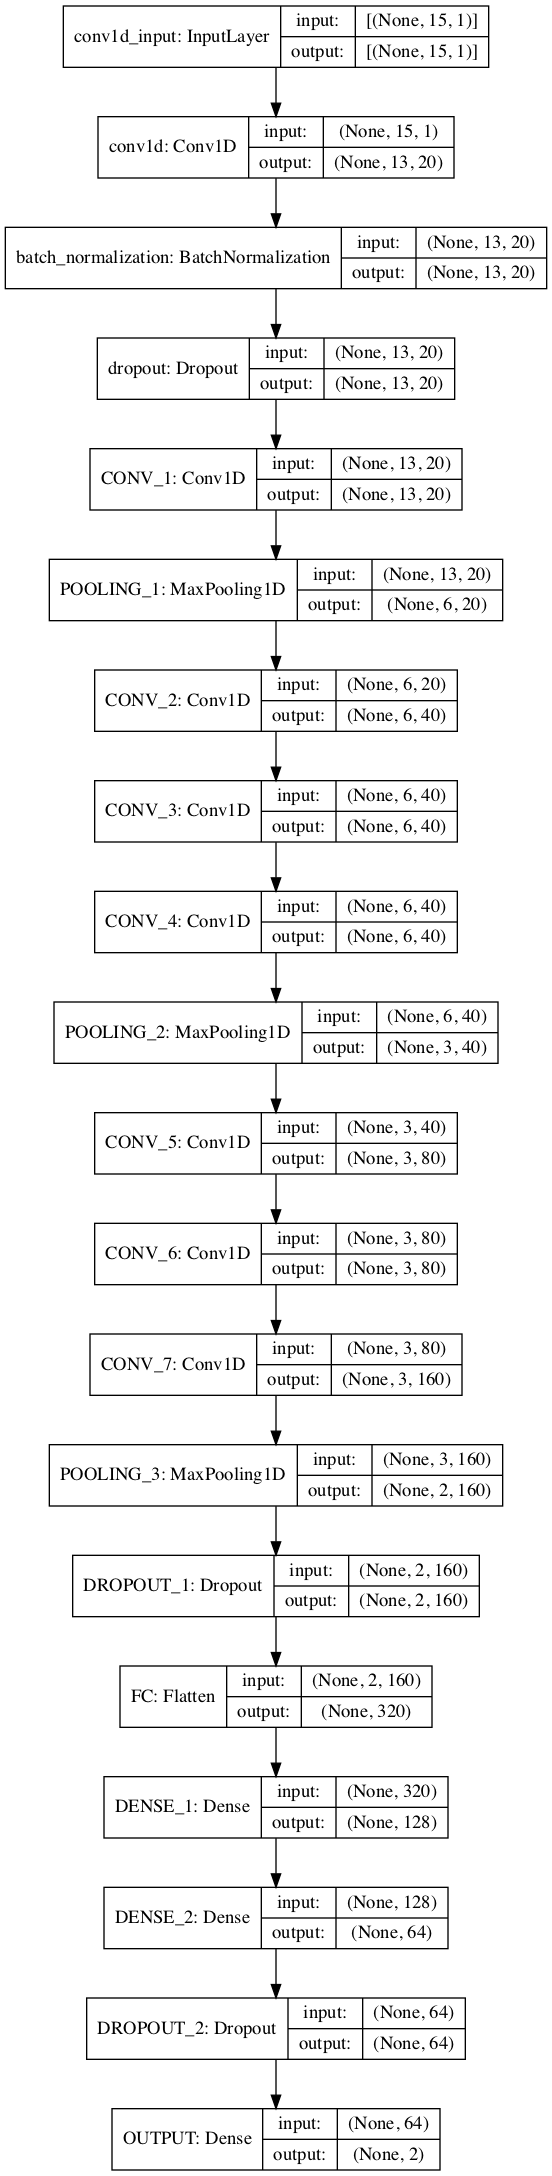

In [46]:
# save plot model

from keras.utils import plot_model
import pydot

plot_model(proposed,to_file='/home/jovyan/Datasets/Dataset3/Graph-Visuals/Final-Proposed-CNN-val.png',show_shapes=True,show_layer_names=True)




# <font color=green>Learning Curves to Diagnose CNN Model Performance </font>


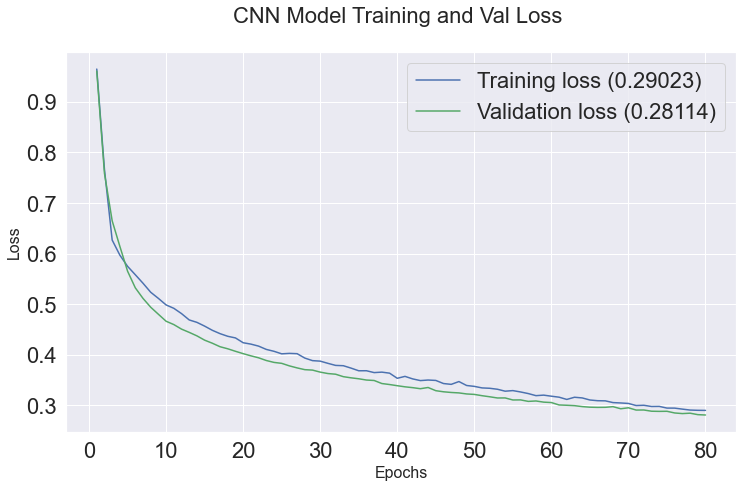

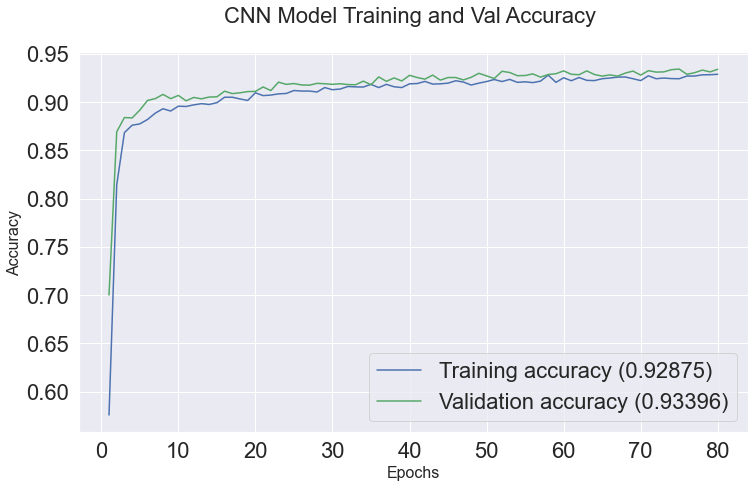

In [47]:
## For Documentation

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(figsize=(12,7))
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('CNN Model Training and Val Loss \n', fontsize=22)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.legend()
    #plt.savefig('/home/jovyan/Datasets/Dataset3/Graph-Visuals/val-loss-DOCU.png')

    
    print('\n \n \n')
    
    ## Accuracy
    plt.figure(figsize=(12,7))
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('CNN Model Training and Val Accuracy \n', fontsize=22)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.legend()
    #plt.savefig('/home/jovyan/Datasets/Dataset3/Graph-Visuals/val-acc-DOCU.png')
    plt.show()
    

#plot the graph
plot_history(history)

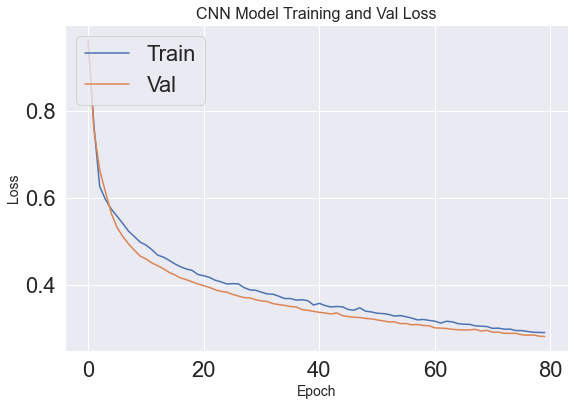

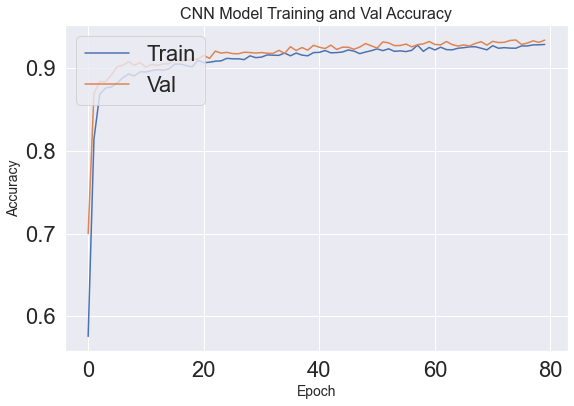

In [48]:
## As shown in docu

## Plot training & test loss values
## Computing Loss Result on Training And Test Results
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Training and Val Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


## Plot training & test accuracy values
## Computing Accuracy on Training And Test Results
plt.figure(figsize=(9,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN Model Training and Val Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


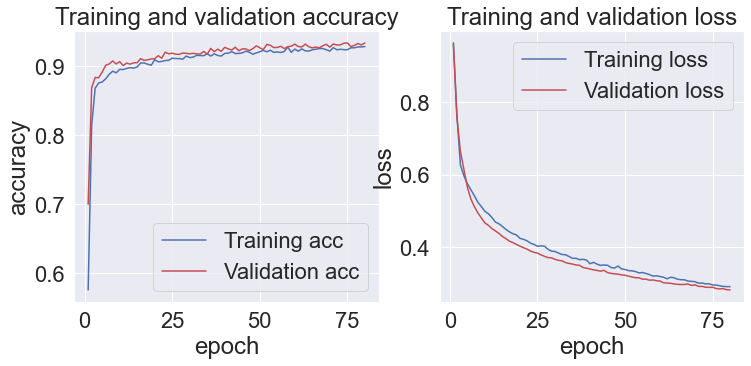

In [49]:
def plot_history(history):
    # summarize history for accuracy
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    # summarize history for loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    # visualize accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    # visualize loss
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title('Training and validation loss')
    plt.legend()

# Show plot
plot_history(history)

In [50]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN (80 epochs)', acc_train_cnn, acc_val_cnn)


# <font color=green> Evaluate and Test CNN Model </font>

In [51]:
score = proposed.evaluate(X_val_reshape, y_val, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.28113523046175637
Test accuracy: 0.93395835


In [52]:
# Predicting results for val dataset

## Since the predictions are floating point values, it will not be feasible to compare the predicted labels with true test labels
## Solution, round off the output which will convert the float values into an integer
## use np.argmax() to select the index number which has a higher value in a row


pred_cnn = proposed.predict(X_val_reshape) #predict function using validation data
pred_cnn = np.argmax(np.round(pred_cnn), axis = 1)


pred_cnn_sample = pred_cnn[:10]  #first 10 predictions
label = y_val[:10] #gets the first 10 labels of the test data


print('predictions:', pred_cnn_sample)  #prints prediction
print('actual:     ', label) #prints actual label

/Users/jillkathleen/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


predictions: [0 1 1 0 1 1 0 0 0 0]
actual:      [0 1 1 0 1 1 0 0 0 0]


### The above output of both array is identical and it indicate that our model predicts correctly the first 10 values


In [53]:
## Predict from X_val using pred_cnn = proposed.predict(X_test_reshape)

## The complete example below makes predictions for each example in the dataset, 
## then prints the input data, predicted class and expected class for the first 5 examples in the dataset.

# summarize the first 10 cases

m=0
for i in range(len(X_val_reshape)):
    if pred_cnn[i]==1:
        m=m+1
    print('Predicted %d---> Expected %d' % (pred_cnn[i], y_val[i]))

Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
P

Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
P

Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
P

Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
P

Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 1
P

In [54]:

pred_cnn.shape, y_train.shape


((4800,), (7200,))

# <font color=green> CNN Confusion Matrix & Classification Report </font>

### With confusion matrix, we'll be able to visually observe how well the model predicts on val data

In [55]:
# CNN classification_report on val data

print(classification_report(y_val, pred_cnn))
print('')
score = proposed.evaluate(X_val_reshape, y_val, verbose=1)
print('Val Loss:', score[0]) 
print('Val Accuracy:', score[1])


# Observation: Correctly predicted 2,242 data out of 2,400 data in validation set

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2400
           1       0.97      0.90      0.93      2400

    accuracy                           0.93      4800
   macro avg       0.94      0.93      0.93      4800
weighted avg       0.94      0.93      0.93      4800


Val Loss: 0.28113523046175637
Val Accuracy: 0.93395835


In [56]:
## Classification Report - complete
## Predict the values from the test set

print('CNN Confusion Matrix on Val Dataset')
print(confusion_matrix(y_val, pred_cnn))

print('')
print('CNN Classification Report on Val Dataset: \n')
print(classification_report(y_val, pred_cnn))

print('')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val, pred_cnn)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_val, pred_cnn)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_val, pred_cnn)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_val, pred_cnn)
print('F1 score: %.2f%%' % f1)




CNN Confusion Matrix on Val Dataset
[[2330   70]
 [ 247 2153]]

CNN Classification Report on Val Dataset: 

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2400
           1       0.97      0.90      0.93      2400

    accuracy                           0.93      4800
   macro avg       0.94      0.93      0.93      4800
weighted avg       0.94      0.93      0.93      4800


Accuracy: 0.93%
Precision: 0.97%
Recall: 0.90%
F1 score: 0.93%


In [57]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_val,pred_cnn)))

from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_val,pred_cnn)))

from sklearn.metrics import f1_score

print("F1 Score: {}".format(f1_score(y_val,pred_cnn)))


print('\n')
print('F1 score: %.2f%%' % (f1*100))
print('Recall: %.2f%%' % (recall*100))
print('Precision: %.2f%%' % (precision*100))
print('Accuracy: %.2f%%' % (accuracy*100))



Precision score: 0.9685110211426001
Recall score: 0.8970833333333333
F1 Score: 0.9314298074843176


F1 score: 93.14%
Recall: 89.71%
Precision: 96.85%
Accuracy: 93.40%


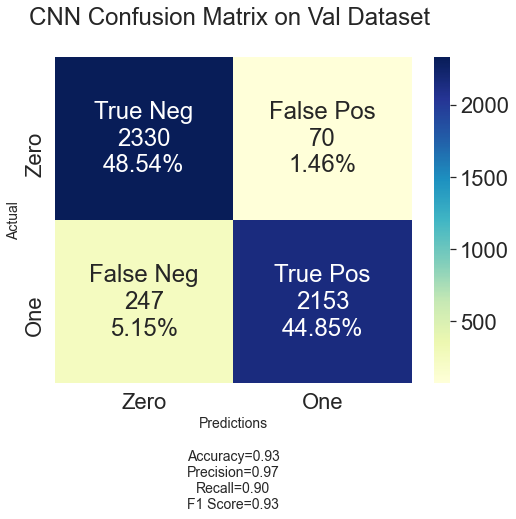

In [58]:

##Get the confusion matrix
cnn_matrix_val = confusion_matrix(y_val, pred_cnn)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='YlGnBu',
                          title='CNN Confusion Matrix on Val Dataset \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=14)
        plt.xlabel('Predictions' + stats_text,  fontsize=14)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        
        

#visualize

labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_val, 
                      group_names=labels,
                      categories=categories)


### Confusion Matrix - summary of prediction results on a classification problem
### The number of correct and incorrect predictions summarized with count values and broken down by each class




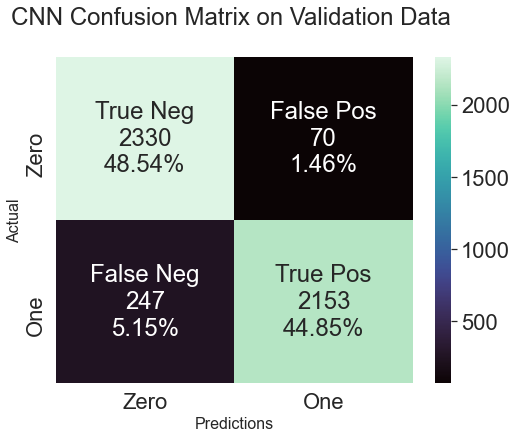

In [59]:
## For Documentation

##Get the confusion matrix
cnn_matrix_val = confusion_matrix(y_val, pred_cnn)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='CNN Confusion Matrix on Validation Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_val, 
                      group_names=labels,
                      categories=categories)

#plt.savefig("/home/jovyan/Datasets/Dataset3/Graph-Visuals/cm-cnn-val-DOCU.png", bbox_inches='tight', pad_inches=0)


In [60]:
## Classification Report - complete
## Predict the values from the test set

train_cnn = proposed.predict(X_train_reshape) #predict function using validation data
train_cnn = np.argmax(np.round(train_cnn), axis = 1)


train_cnn_sample = train_cnn[:10]  #first 10 predictions
label = y_train[:10] #gets the first 10 labels of the test data

print('predictions:', pred_cnn_sample)  #prints prediction
print('actual:     ', label) #prints actual label

print('\n\n')
print('Performance Evaluation of CNN on Training Data')
print('')

print("CNN: Accuracy on Training Data: %.2f%%" % (acc_train_cnn))

print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_train, train_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_train, train_cnn))

print('')
score = proposed.evaluate(X_train_reshape, y_train, verbose=0)
print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

predictions: [0 1 1 0 1 1 0 0 0 0]
actual:      [0 0 0 1 0 1 1 0 1 1]



Performance Evaluation of CNN on Training Data

CNN: Accuracy on Training Data: 93.69%

CNN Confusion Matrix:
[[3528   72]
 [ 382 3218]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3600
           1       0.98      0.89      0.93      3600

    accuracy                           0.94      7200
   macro avg       0.94      0.94      0.94      7200
weighted avg       0.94      0.94      0.94      7200


Train loss: 0.270586844517125
Train accuracy: 0.9369444



# <font color=green> Predicted vs Expected Results </font>

In [61]:
# Predict on the first 5 test images.
predictions = proposed.predict(X_val_reshape[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(X_val_reshape[:5]) # [7, 2, 1, 0, 4]

[0 1 1 0 1]
[[[ 0.        ]
  [-0.15409478]
  [ 0.60752084]
  [ 0.1659441 ]
  [-0.11624764]
  [ 0.        ]
  [-0.32946173]
  [-0.42259788]
  [-0.23241869]
  [ 0.43598468]
  [-1.06369108]
  [ 0.4380133 ]
  [-0.55959783]
  [-0.36621135]
  [-0.6386704 ]]

 [[ 0.        ]
  [-0.15409478]
  [ 0.60752084]
  [ 1.11457256]
  [-0.11624764]
  [ 0.        ]
  [-0.32946173]
  [-0.42259788]
  [-0.23241869]
  [ 0.43598468]
  [-1.06369108]
  [ 0.4380133 ]
  [-0.55959783]
  [ 0.55539708]
  [ 1.56575285]]

 [[ 0.        ]
  [-0.15409478]
  [-1.64603406]
  [-1.25699859]
  [-0.11624764]
  [ 0.        ]
  [-0.32946173]
  [-0.42259788]
  [-0.23241869]
  [ 0.43598468]
  [ 0.94012257]
  [ 0.4380133 ]
  [ 1.78699763]
  [-0.73485473]
  [ 1.56575285]]

 [[ 0.        ]
  [-0.15409478]
  [ 0.60752084]
  [ 0.1659441 ]
  [-0.11624764]
  [ 0.        ]
  [ 3.03525385]
  [-0.42259788]
  [-0.23241869]
  [ 0.43598468]
  [ 0.94012257]
  [ 0.4380133 ]
  [-0.55959783]
  [-0.18188966]
  [-0.6386704 ]]

 [[ 0.        ]
  [-

In [62]:
pred = proposed.predict(X_val_reshape)
pred = np.argmax(np.round(pred),axis=1)

print('predict', pred)
print('actual', y_val)

predict [0 1 1 ... 1 1 0]
actual [0 1 1 ... 1 1 0]


In [63]:
##  y_pred and y_val compare

print('Predictions: ', pred[:15])

print( 'Actual:      ', y_val[:15])

Predictions:  [0 1 1 0 1 1 0 0 0 0 0 0 0 0 0]
Actual:       [0 1 1 0 1 1 0 0 0 0 0 0 0 0 0]


In [64]:
## Compare actual and expected values

## The complete example below makes predictions for each example in the dataset, then prints the input data, predicted class and expected class for the first 5 examples in the dataset.
# make class predictions with the model
#predict = proposed.predict_classes(X_test)
# summarize the first 5 cases
m=0
for i in range(len(X_val)):
    if train_cnn[i]==1:
        m=m+1
    print('Predicted %d---> Expected %d' % (train_cnn[i], y_train[i]))
    
## on training data
    

Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
P

Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
P

Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
P

Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
P

Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 1
P

Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
P

Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
P

Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 0
Predicted 1---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
P


# <font color=green> Save Proposed CNN Model as hd5 file </font>

In [65]:

# save proposed model as hd5 file

"""# Save Model"""

 
from keras.models import load_model
proposed.save('/home/jovyan/Datasets/Dataset3/Final-CNN-Val.hdf5')  # creates a HDF5 file 'my_model.h5'

# returns a compiled model
proposed_load_model = load_model('/home/jovyan/Datasets/Dataset3/Final-CNN-Val.hdf5')
 
y_pred_sample = proposed_load_model.predict(np.expand_dims(X_val_reshape[0], axis=0)).round(2)
y_pred_sample

np.argmax(y_pred_sample[0])
 
# predicted values after loading the model
y_val[:10]


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0])


## <font color=green> Training with Early Stopping Back </font>

#### to see difference with training the model with epoch setting

In [66]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, History


tf.random.set_random_seed(2)

# Model configuration
ADAM = Adam(learning_rate=0.0001)
verbosity = 2
l1 = regularizers.l1(0.0001)

INPUT_DIM = X_train_reshape[0].shape
                                # Define the model architecture
#--Layer Name
model = Sequential(name="Proposed_Model")
    
#--Input Layer
model.add(Conv1D(20, 3, activation='relu', input_shape = INPUT_DIM))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#--Convo Layer 1
model.add(Conv1D(20, 3, activation='relu', padding='same', name="CONV_1"))
model.add(MaxPooling1D(2, name="POOLING_1"))

#--Convo Layer 2
model.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_2", kernel_regularizer=l1))
#--Convo Layer 3
model.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_3"))
#--Convo Layer 4
model.add(Conv1D(40, 5, activation='relu', padding='same', name="CONV_4"))
model.add(MaxPooling1D(2, name="POOLING_2", padding='same'))

#--Convo Layer 5
model.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_5", kernel_regularizer=l1))
#--Convo Layer 6
model.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_6"))
#--Convo Layer 7
model.add(Conv1D(160, 3, activation='relu', padding='same', name="CONV_7"))
model.add(MaxPooling1D(2, name="POOLING_3", padding='same'))
model.add(Dropout(0.4, name="DROPOUT_1"))

##-----Fully Connected Layer
model.add(Flatten(name="FC"))

##--First Fully Connected Layer 5
model.add(Dense(128, activation='relu', name='DENSE_1', kernel_regularizer=l1))

model.add(Dense(64, activation='relu', name='DENSE_2'))
model.add(Dropout(0.5, name="DROPOUT_2"))
    
##--Fully Connected Output Layer
model.add(Dense(2, activation='softmax', name="OUTPUT"))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])



## Save model with best Val
filepath = "/home/jovyan/Datasets/Dataset3/Best-Weights-Final.hdf5" 


## Model Checkpoint and Early Stopping
me_callbacks   = [
      EarlyStopping(monitor='val_acc', patience=5, mode='max', min_delta=0.0001),
      ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True, mode='max', verbose=2)
]


## Fit the model
history_callback = model.fit(X_train_reshape, y_train,
          batch_size=128,
          epochs=200,
          validation_data = (X_val_reshape, y_val), 
          callbacks=me_callbacks)




Train on 7200 samples, validate on 4800 samples
Epoch 1/200
7040/7200 [============================>.] - ETA: 0s - loss: 0.9762 - acc: 0.5232
Epoch 00001: val_acc improved from -inf to 0.81063, saving model to /Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Best-Weights-Final.hdf5
7200/7200 [==============================] - 3s 440us/sample - loss: 0.9746 - acc: 0.5268 - val_loss: 0.9664 - val_acc: 0.8106
Epoch 2/200
7168/7200 [============================>.] - ETA: 0s - loss: 0.7976 - acc: 0.7949
Epoch 00002: val_acc improved from 0.81063 to 0.85333, saving model to /Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Best-Weights-Final.hdf5
7200/7200 [==============================] - 2s 224us/sample - loss: 0.7972 - acc: 0.7951 - val_loss: 0.7656 - val_acc: 0.8533
Epoch 3/200
7168/7200 [============================>.] - ETA: 0s - loss: 0.6616 - acc: 0.8534
Epoch 00003: val_acc improved from 0.85333 to 0.85958, saving model to /Users

Epoch 25/200
7168/7200 [============================>.] - ETA: 0s - loss: 0.4091 - acc: 0.8990
Epoch 00025: val_acc improved from 0.91104 to 0.91438, saving model to /Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Best-Weights-Final.hdf5
7200/7200 [==============================] - 2s 222us/sample - loss: 0.4082 - acc: 0.8994 - val_loss: 0.3786 - val_acc: 0.9144
Epoch 26/200
7040/7200 [============================>.] - ETA: 0s - loss: 0.3988 - acc: 0.9060
Epoch 00026: val_acc did not improve from 0.91438
7200/7200 [==============================] - 2s 212us/sample - loss: 0.3989 - acc: 0.9058 - val_loss: 0.3747 - val_acc: 0.9092
Epoch 27/200
7200/7200 [==============================] - ETA: 0s - loss: 0.3949 - acc: 0.9060
Epoch 00027: val_acc did not improve from 0.91438
7200/7200 [==============================] - 1s 202us/sample - loss: 0.3949 - acc: 0.9060 - val_loss: 0.3689 - val_acc: 0.9098
Epoch 28/200
7168/7200 [============================>.] - ETA: 

Train: 0.9168, Val: 0.9144


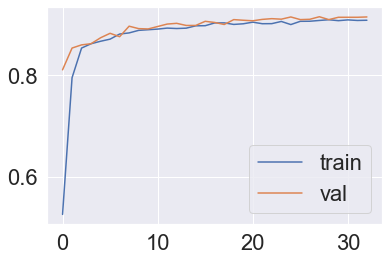

In [67]:
# evaluate the model
_, train_acc = model.evaluate(X_train_reshape, y_train, verbose=0)
_, val_acc = model.evaluate(X_val_reshape, y_val, verbose=0)
print('Train: %.4f, Val: %.4f' % (train_acc, val_acc))
# plot training history
plt.plot(history_callback.history['acc'], label='train')
plt.plot(history_callback.history['val_acc'], label='val')
plt.legend()
plt.show()

In [68]:
## Evaluate model scores - Early Stopping

acc_train_es = (model.evaluate(X_train_reshape, y_train)[1]*100)
acc_val_es = (model.evaluate(X_val_reshape, y_val)[1]*100)

print("With Early Stopping")
print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_es))
print("CNN: Accuracy on validation Data: %.2f%%" % (acc_val_es))


With Early Stopping

CNN: Accuracy on training Data: 91.68%
CNN: Accuracy on validation Data: 91.44%


In [69]:
history_callback.history

#see results below

{'loss': [0.9746240782737732,
  0.7971875786781311,
  0.6614657065603469,
  0.6187438294622634,
  0.5838337104850345,
  0.5698061121834649,
  0.5448687892489963,
  0.5308687546518114,
  0.518840655485789,
  0.5039495025740729,
  0.49460394620895387,
  0.48278241634368896,
  0.47455706967247857,
  0.4704860782623291,
  0.46003100898530747,
  0.45028571062617834,
  0.4421680898136563,
  0.43242654694451227,
  0.43190343724356756,
  0.4297506954934862,
  0.421286977397071,
  0.41886889775594077,
  0.41193052079942494,
  0.4060237630208333,
  0.4082424628734589,
  0.39894460956255595,
  0.39489348067177665,
  0.3870953561200036,
  0.3886751675605774,
  0.3868761256006029,
  0.3861966840426127,
  0.37955044163597956,
  0.3755855566925473],
 'acc': [0.5268056,
  0.7951389,
  0.85333335,
  0.86180556,
  0.8666667,
  0.87083334,
  0.8808333,
  0.88305557,
  0.88805556,
  0.88930553,
  0.89055556,
  0.8925,
  0.89166665,
  0.8923611,
  0.89694446,
  0.8972222,
  0.9026389,
  0.9027778,
  0.8997

In [70]:
history_callback.history??

In [71]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.

storeResults('CNN (with early stopping)', acc_train_es, acc_val_es)


In [72]:
from tensorflow.keras.models import load_model


model = load_model(filepath)
scores = proposed.evaluate(X_val_reshape, y_val, verbose=2)
print(f'Score: {proposed.metrics_names[0]} of {scores[0]}; {proposed.metrics_names[1]} of {scores[1]*100}%')

Score: loss of 0.28113523046175637; acc of 93.3958351612091%


In [73]:
#creating dataframe
results = pd.DataFrame({'CNN Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Val Accuracy': acc_val})
results

,CNN Model,Train Accuracy,Val Accuracy
0,Decision Tree,89.97%,89.65%
1,Random Forest,91.00%,90.75%
2,CNN (80 epochs),93.69%,93.40%
3,CNN (with early stopping),91.68%,91.44%


In [74]:

## Learning Curve - Plot - Early Stopping

history_callback.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

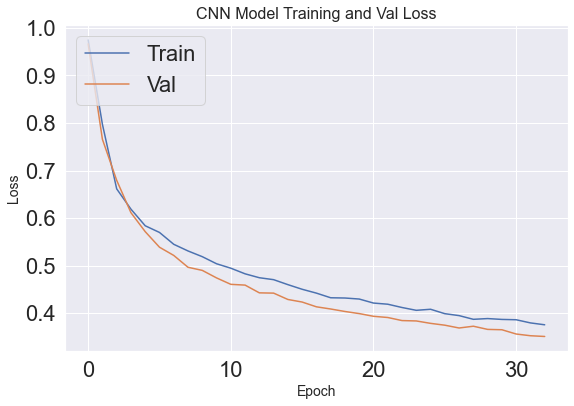

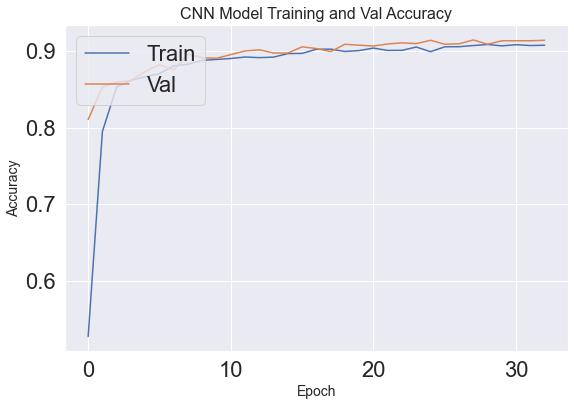

In [75]:
## Plot training & test loss values
## Computing Loss Result on Training And Val Results
plt.figure(figsize=(9,6))
plt.plot(history_callback.history['loss'])
plt.plot(history_callback.history['val_loss'])
plt.title('CNN Model Training and Val Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Val'], loc='upper left')
#plt.savefig('/home/jovyan/Datasets/Dataset3/Graph-Visuals/ES-train-loss.png')
plt.show()


## Plot training & test accuracy values
## Computing Accuracy on Training And Test Results
plt.figure(figsize=(9,6))
plt.plot(history_callback.history['acc'])
plt.plot(history_callback.history['val_acc'])
plt.title('CNN Model Training and Val Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Val'], loc='upper left')
#plt.savefig('/home/jovyan/Datasets/Dataset3/Graph-Visuals/ES-acc-loss.png')
plt.show()


# End of Validation Evaluation - Completed
